In [2]:
from collections import Counter
from tqdm import tqdm
import json
import pandas as pd
import numpy as np

In [ ]:
# download buzzpoint-data-small.txt (168 MB) from this link:
# https://drive.google.com/file/d/1PfIMa-eh5nQHm9ERTpKLVxNST7DTGoXq/view?usp=sharing
# this only includes the "celerity", "isCorrect", and "difficulty" fields

In [ ]:
# download buzzpoint-data-big.txt (394 MB) from this link:
# https://drive.google.com/file/d/12-97sHnTA9eqJ5Ja_O4N-hUDFt6XgAen/view?usp=sharing
# in addition to the above fields, this includes "_id", "subcategory", and "alternate_subcategory" (if it exists)

In [ ]:
buzzpoints = []
with open('buzzpoint-data.txt') as f:
    for line in tqdm(f):
        buzzpoints.append(json.loads(line))

2917962it [00:04, 676980.80it/s]


In [4]:
df = pd.DataFrame(buzzpoints)
df = df.loc[(df['celerity'] <= 1.0) & (df['celerity'] >= 0.0)]
df

,celerity,isCorrect,difficulty
0,0.517241,False,7
1,0.336436,True,6
2,0.097291,True,7
3,0.000000,True,7
4,0.552664,False,7
...,...,...,...
2917957,0.017417,True,4
2917958,0.865569,True,5
2917959,0.245307,True,5
2917960,0.119863,True,3


In [10]:
for [lower, upper] in [[1, 2], [3, 5], [6, 8], [9, 10]]:
    temp_df = df.loc[(df['difficulty'] >= lower) & (df['difficulty'] <= upper)]
    print(f'difficulties {lower} to {upper}: {len(temp_df)} questions')
    for correct in [True, False]:
        celerities = temp_df.loc[(temp_df['isCorrect'] == correct) & (df['celerity'] > 0), 'celerity'].values
        celerities = np.floor(20 * celerities) / 20
        counts = []
        for i in range(0, 21):
            counts.append(np.sum(celerities == i/20))
        print(f'{correct}: {counts}')

    correct = sum(temp_df['isCorrect'])
    print(f'{correct}/{len(temp_df)} ({correct/len(temp_df)*100:.2f}%)')
    end = temp_df.loc[temp_df['celerity'] == 0]
    print(f'{len(end)}/{len(temp_df)} ({len(end)/len(temp_df)*100:.2f}%)')
    print()

difficulties 1 to 2: 546762 questions
True: [11337, 12754, 13830, 15806, 16889, 17129, 17422, 17639, 18710, 19444, 20610, 20667, 20683, 20837, 22565, 25328, 23742, 12888, 2407, 787, 0]
False: [2897, 3526, 3983, 4645, 4866, 5218, 5427, 5587, 6084, 6139, 6429, 6462, 6217, 6416, 6400, 6360, 4971, 2368, 1037, 1581, 12]
405247/546762 (74.12%)
118663/546762 (21.70%)

difficulties 3 to 5: 1706138 questions
True: [46518, 49312, 59738, 60321, 58337, 57581, 58921, 60667, 59449, 57866, 57030, 55423, 53349, 48334, 40934, 37458, 37758, 27999, 7028, 2765, 3]
False: [13627, 16145, 19896, 20840, 21156, 22286, 23431, 24927, 25800, 26522, 27485, 26590, 24989, 21843, 18291, 16705, 14712, 8616, 2715, 3560, 30]
1150036/1706138 (67.41%)
389181/1706138 (22.81%)

difficulties 6 to 8: 542938 questions
True: [16918, 19378, 23738, 22743, 21767, 21490, 21992, 21339, 20742, 19685, 19008, 17198, 15972, 14190, 11492, 9608, 9207, 7242, 1809, 218, 0]
False: [4133, 5332, 6744, 6869, 6890, 7650, 7942, 8229, 8429, 8418, 

<Axes: ylabel='Frequency'>

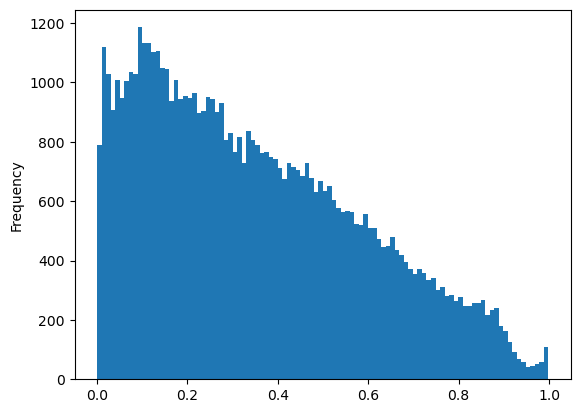

In [11]:
[lower, upper] = [9, 10]
df.loc[(df['difficulty'] >= lower) & (df['difficulty'] <= upper) & (df['celerity'] > 0), 'celerity'].plot.hist(bins=100)

In [7]:
print(f'{sum(df['celerity'] == 0)} / {len(df)} ({100*sum(df['celerity'] == 0)/len(df):.2f}%) questions have celerity 0')

664370 / 2917960 (22.77%) questions have celerity 0
